# Assigment 3
# Determining and removing drawbacks of exponential and running mean
# Task 1

## Team 6: Berman Vladimir, Dronova Maria, Bazhenov Artem, Skoltech, October, 2022

### Setting functions

In [1]:
# Initialisation of libraries 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setting the function for forward exponential smoothing
def exp_smooth(alp, arr):
    dub = np.array(arr)
    for i in range(1, len(arr)):
        dub[i] = dub[i - 1] + alp * (dub[i] - dub[i - 1])
    return dub

In [3]:
# Setting the function for backward exponential smoothing
def backward_exp_smooth(alp, arr):
    dub = np.array(arr)
    for i in range(len(arr) - 2, -1, -1):
        dub[i] = dub[i + 1] + alp * (dub[i] - dub[i + 1])
    return dub

In [147]:
# Setting the function for running mean
def mean_smooth(wind, arr):
    gap = (wind - 1) // 2
    dub = np.array(arr)
    m = np.mean(dub[:gap])
    for i in range(gap):
        dub[i] = m
    m = np.mean(dub[len(dub) - (gap + 1):len(dub)])
    for i in range(len(dub) - (gap + 1), len(dub)):
        dub[i] = m
    for i in range(gap, len(arr) - (gap + 1)):
        dub[i] = np.mean(arr[i - gap : i + (gap + 1)])
    return dub

In [148]:
# Setting the function for deviation idicator
def deviation_indicator(arrz, arrx):
    return sum(np.square(arrz - arrx))

In [149]:
# Setting the function for variability idicator
def variability_indicator(arr):
    summ = 0
    for i in range(len(arr) - 2):
        summ = summ + (arr[i + 2] - 2 * arr[i + 1] + arr[i]) ** 2
    return summ

In [150]:
# Setting the function for generating velocity and acceleration
def gnerate_vel_and_ac(exp, var, T, V0, numb):
    arr = np.zeros(numb)
    arr[0] = V0
    a = np.random.normal(exp, var ** 0.5, numb)
    for i in range(1, len(arr)):
        arr[i] = arr[i - 1] + a[i - 1] * T
    return arr, a

In [151]:
# Setting the function for generating coordinates
def generate_x(T, X0, a, v):
    arr = np.zeros(len(a))
    arr[0] = X0
    for i in range(1, len(a)):
        arr[i] = arr[i - 1] + v[i - 1] * T + a[i - 1] * (T ** 2) / 2
    return arr

# PART 1. Backward exponential smoothing 

In [152]:
x0 = 10 #initial condition

sigmaw_2 = 28 ** 2 # variance of unbiased random noise 

# setting size of true trajectory
x = np.ones(300)

# genration of normal noise
w = np.random.normal(0, sigmaw_2 ** 0.5, 300)

# generation of true trajectory 
x = x + w

sigmaeta_2 = 97 ** 2  # standard deviation of measurement noise

z = np.ones(300) # setting amount of measurements

# genration of normal noise
eta = np.random.normal(0, sigmaeta_2 ** 0.5, 300)

# genration of measurements
z = x + eta

In [153]:
# Calculating window size M and smoothing constant alpha
hi = sigmaw_2 / sigmaeta_2
alp = (-hi + np.sqrt(hi ** 2 + 4 * hi)) / 2
M = round((2 - alp) / alp)
print('Smoothing constant =', alp)
print('Window size =', M)

Smoothing constant = 0.24998861233121078
Window size = 7


Text(0.5, 1.0, 'Graph 1\nComparison of running mean and backward exponential smoothing')

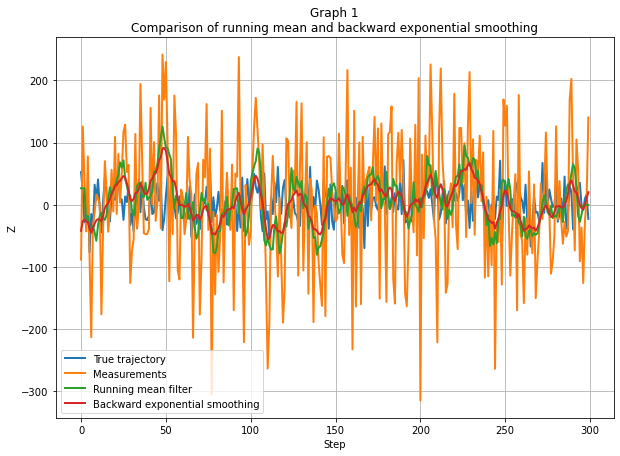

In [154]:
plt.figure(figsize=(10, 7))
plt.plot(x, linewidth = 2)
plt.plot(z, linewidth = 2)
plt.plot(mean_smooth(M, z), linewidth = 2)
plt.plot(backward_exp_smooth(alp, exp_smooth(alp, z)), linewidth = 2)
plt.grid()
plt.ylabel('Z')
plt.xlabel('Step')
plt.legend(['True trajectory', 'Measurements', 'Running mean filter', 'Backward exponential smoothing'])
plt.title('Graph 1\nComparison of running mean and backward exponential smoothing')

In [155]:
print('Deviation indicator for backward exponential smoothing =', deviation_indicator(z, backward_exp_smooth(alp, exp_smooth(alp, z))))
print('Deviation indicator for running mean =',deviation_indicator(z, mean_smooth(M, z)))

Deviation indicator for backward exponential smoothing = 2624196.6419324703
Deviation indicator for running mean = 2989275.7021037946


In [156]:
print('Variability indicator for backward exponential smoothing =',variability_indicator(mean_smooth(M, z)))
print('Variability indicator for running mean =',variability_indicator(backward_exp_smooth(alp, exp_smooth(alp, z))))

Variability indicator for backward exponential smoothing = 277404.124516049
Variability indicator for running mean = 18104.577980865302


### As we can see from graph1 and deviation indicator, running mean gives graph that is closer to the measurements than the one after backward smoothing. However, that is not always a good result bacause in this particular situation we see a lot of noise, therefore it is better to have mostly smothed graph rather than the one that is closer to the noisy trajectory. It applies to the variability indicator too: if we do not know the rate of change of the process then we better choose the running mean.

# PART 2. Drawbacks of running mean 
## First trajectory

In [157]:
# initial conditions
x0 = 5 
v0 = 0 
T = 0.1
sigmaa_2 = 10 # variance of noise
numb = 300 # amount of points 
v,a = gnerate_vel_and_ac(0, sigmaa_2 ** 0.5, T, v0, numb) # generating velocity and acceleration
x = generate_x(T, x0, a, v) # generating measurements 

In [158]:
sigmaeta_2 = 500 # variance of random noise
eta = np.random.normal(0, sigmaeta_2 ** 0.5, 300) # generating random noise 
z = x + eta # generating measurements

### Ploting the graph of dependence of the smoothing constant and window size on the deviation and variability indicators in order to determine the best estimation of the process. It is better to have both the deviation and variability idicators as small as possible but these are mutually exclusive situations, since proximity to a noisy trajectory entails more variability.

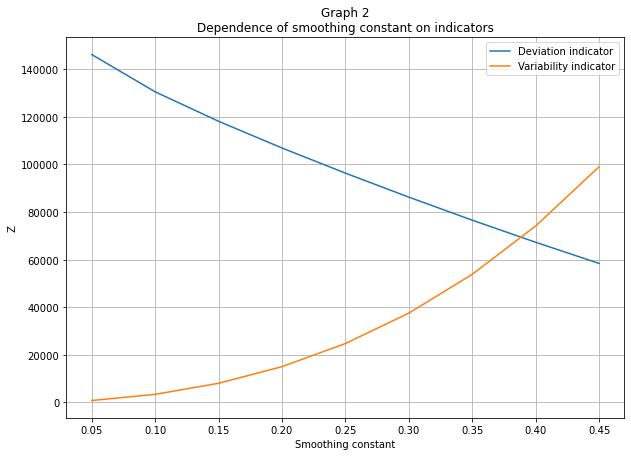

Text(0.5, 1.0, 'Grap 3\nDependence of window size on indicators')

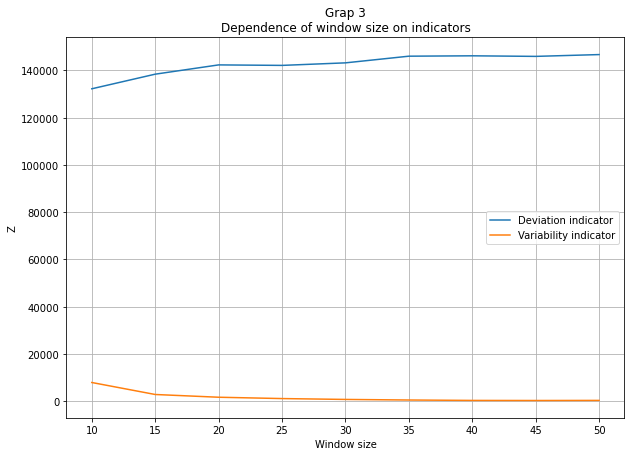

In [159]:
# Setting the interval for the window size and smoothing constant
alp = np.arange(0.05, 0.5, 0.05)
M = np.arange(10, 55, 5)
var_alp = []
dev_alp = []
var_M = []
dev_M = []
for i in range(len(M)):
    dev_alp.append(deviation_indicator(z, exp_smooth(alp[i], z)))
    var_alp.append(variability_indicator(exp_smooth(alp[i], z)))
    dev_M.append(deviation_indicator(z, mean_smooth(M[i], z)))
    var_M.append(variability_indicator(mean_smooth(M[i], z)))

plt.show()
plt.figure(figsize=(10, 7))
plt.plot(alp, dev_alp)
plt.plot(alp, var_alp)
plt.grid()
plt.ylabel('Z')
plt.xlabel('Smoothing constant')
plt.legend(['Deviation indicator', 'Variability indicator'])
plt.title('Graph 2\nDependence of smoothing constant on indicators')

plt.show()
plt.figure(figsize=(10, 7))
plt.plot(M, dev_M)
plt.plot(M, var_M)
plt.grid()
plt.ylabel('Z')
plt.xlabel('Window size')
plt.legend(['Deviation indicator', 'Variability indicator'])
plt.title('Grap 3\nDependence of window size on indicators')

### From the graph 2 we can see the decrease of deviation indicator with increasing smoothing constant. Graph 3 shows no significant change in deviation indicator due to the fact that firstly with smaller window size entire graph is rather noisy. With bigger M graph in the center is smoothed but on the ends where the filter stops working it is quite abrupt. Now we have to keep in mind that since we are analyzing the  process which rate of change is changed insignificantly and measurement noise is great then we have to smooth the graph a lot in order to be as close to line as possible and get rid of noise. Hence the conclusion that we need a large window size and little  smoothing consant regardles of the optimal point on the graph. But as was said before, bigger wind size comes with uncleared noise on the ends of the graphs so it is better to choose some  value in the middle of our interval, for example M = 20. What comes to smoothing constant, it is better to take closer to the smallest ones, for example alha = 0.05.

Text(0.5, 1.0, 'Graph 4\nOptimal running mean and exponential smoothing')

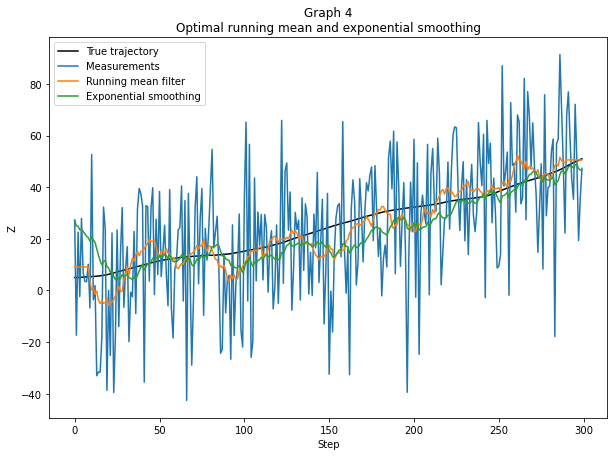

In [160]:
# Plotting graphs with optimal M and alpha 
M = 20
alp = 0.05
plt.figure(figsize=(10, 7))
plt.plot(x, color = 'black')
plt.plot(z)
plt.plot(mean_smooth(M, z))
plt.plot(exp_smooth(alp, z))
plt.ylabel('Z')
plt.xlabel('Step')
plt.legend(['True trajectory', 'Measurements', 'Running mean filter','Exponential smoothing'])
plt.title('Graph 4\nOptimal running mean and exponential smoothing')

### Checking the proximity to the true trajectory

In [161]:
print(np.std(mean_smooth(M, z)[6:len(z) - 6] - x[6:len(z)-6]))

5.148182443382231


## Second trajectory

Text(0.5, 1.0, 'Graph 5\nRunning mean filter for cyclic process')

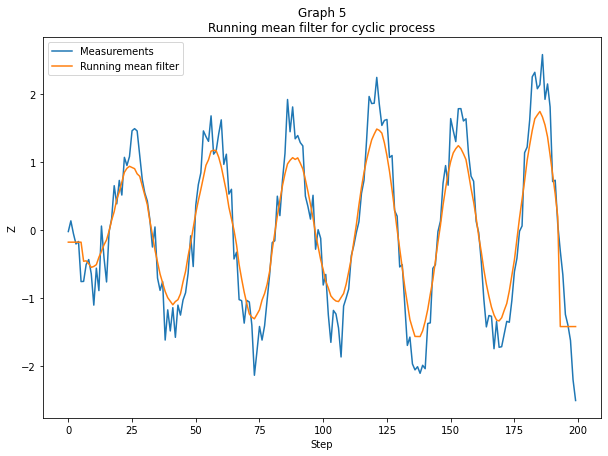

In [162]:
# initial conditions
A0 = 1
A = np.zeros(200)
x_sin = np.zeros(200)
sigmaw_2 = 0.08 ** 2
T = 32

w = np.random.normal(0, sigmaw_2 ** 0.5, 200) # generating random normal noise

# Amplitude generation
A[0] = A0
for i in range(1, len(A)):
    A[i] = A[i - 1] + w[i]
    
# Angular velocity
omeg = 2 * np.pi / T

# Generating cyclic trajectory 
for i in range(len(x_sin)):
    x_sin[i] = A[i] * np.sin(omeg * i + 3)

# Generating measurements with noise      
nu_sin = np.random.normal(0, 0.05 ** 0.5, 200)
z_sin = x_sin + nu_sin

# Ploting running mean filter graph
plt.figure(figsize=(10, 7))
plt.plot(z_sin)
plt.plot(mean_smooth(13, z_sin))
plt.ylabel('Z')
plt.xlabel('Step')
plt.legend(['Measurements', 'Running mean filter'])
plt.title('Graph 5\nRunning mean filter for cyclic process')

### Determining the period of oscillations with M = 25 for 
### a) inverse oscillations, 
### b) zero oscillations, 
### c) insignificant change of oscillations 

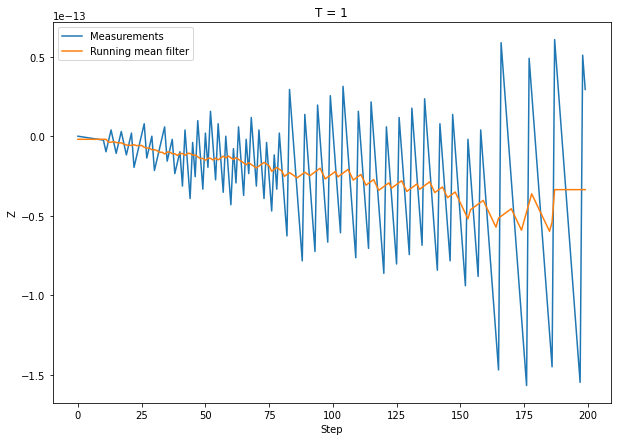

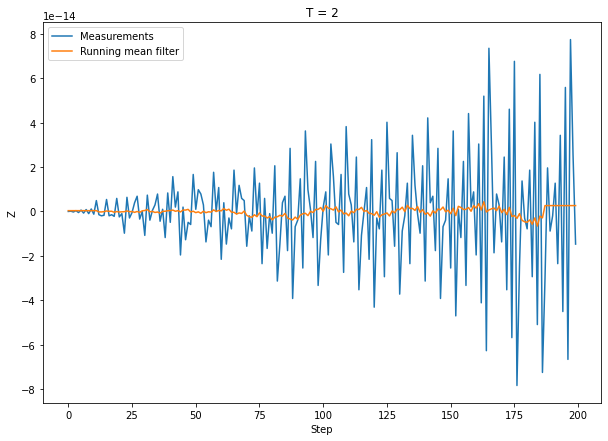

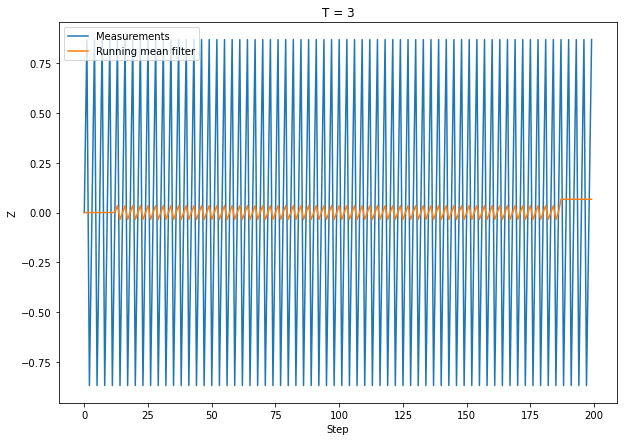

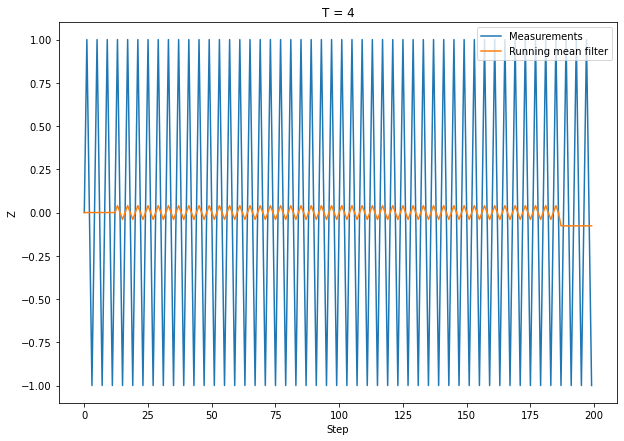

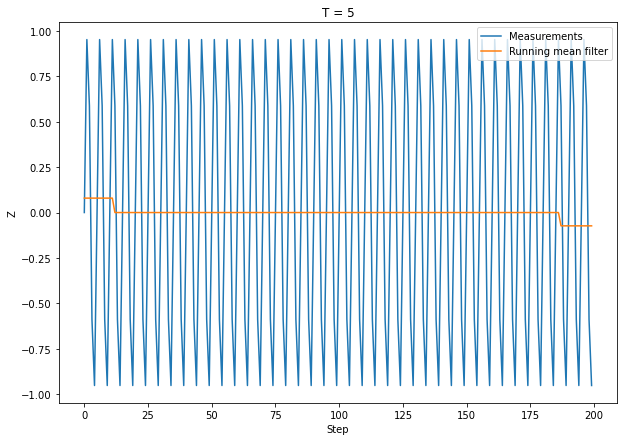

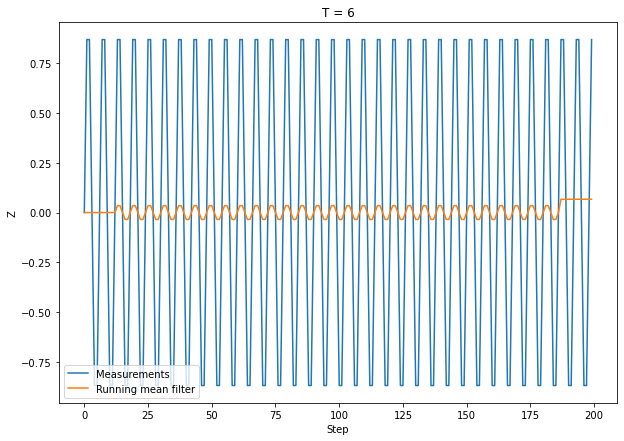

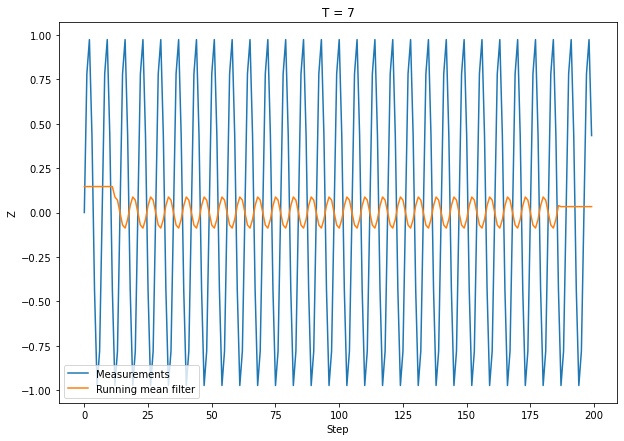

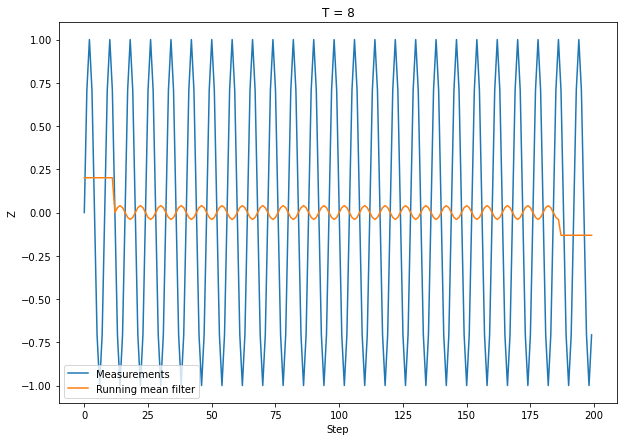

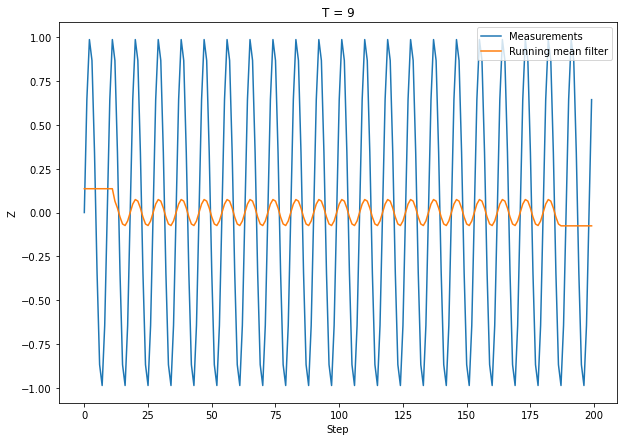

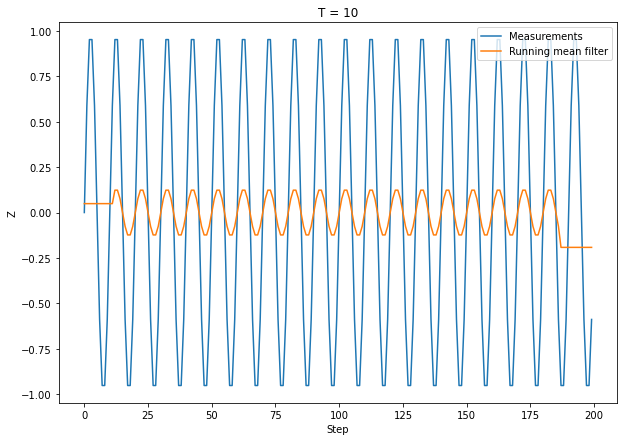

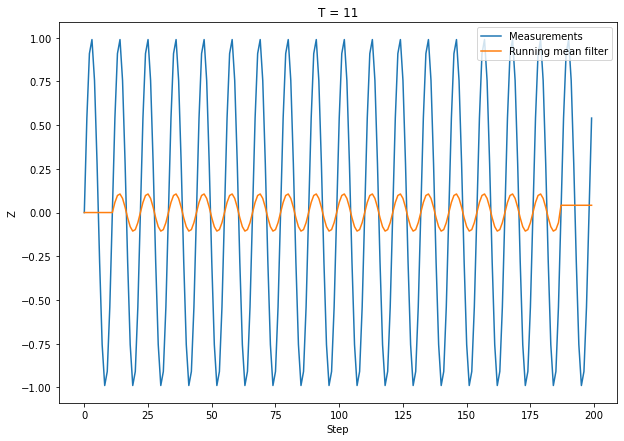

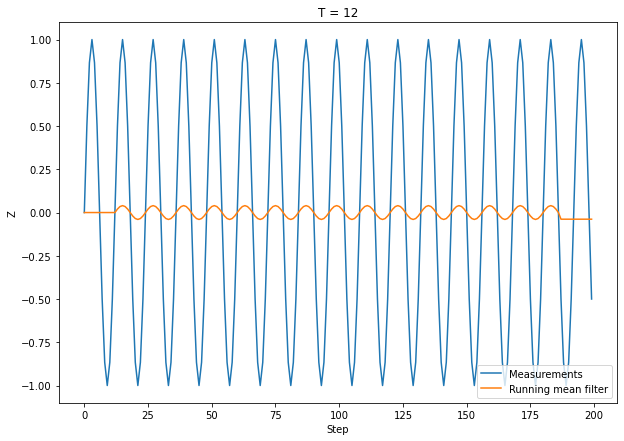

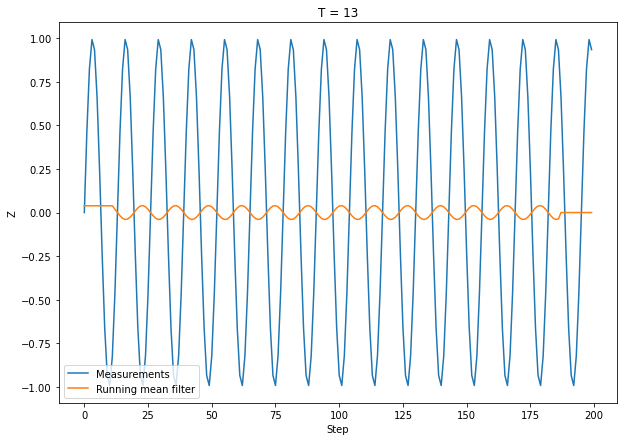

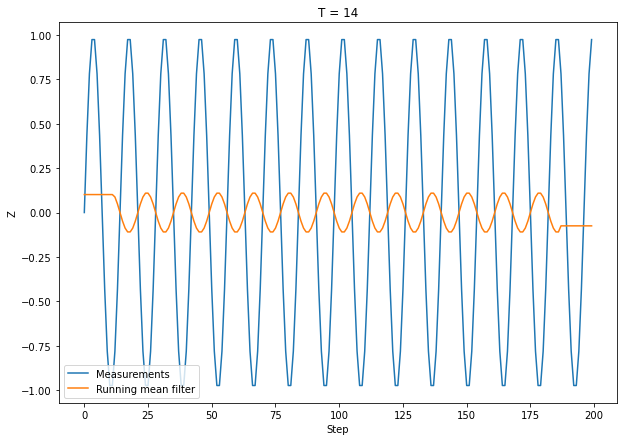

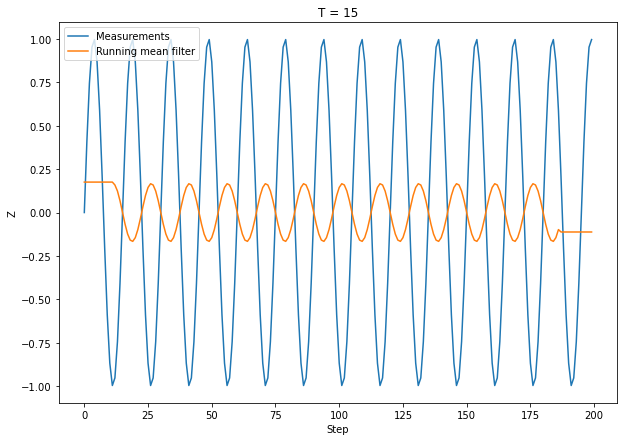

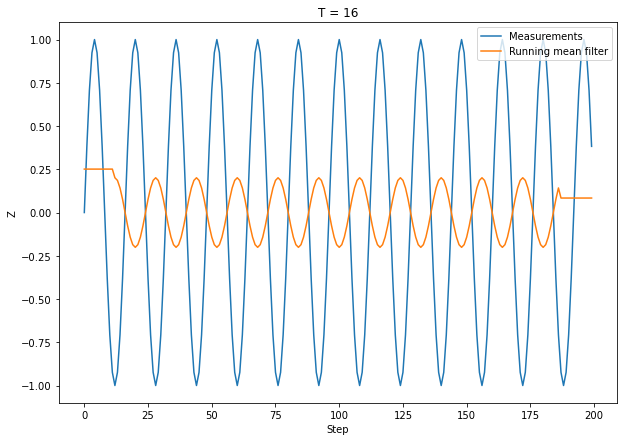

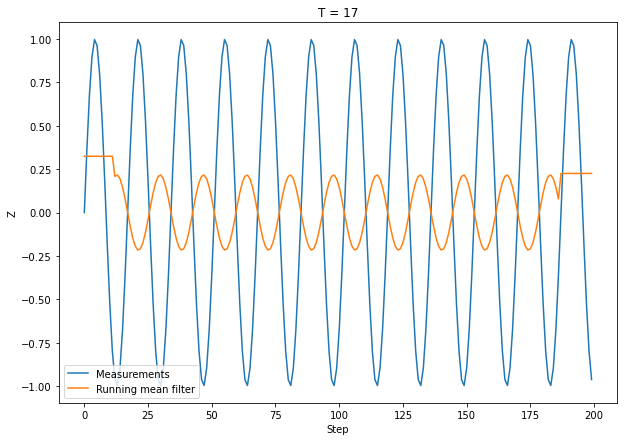

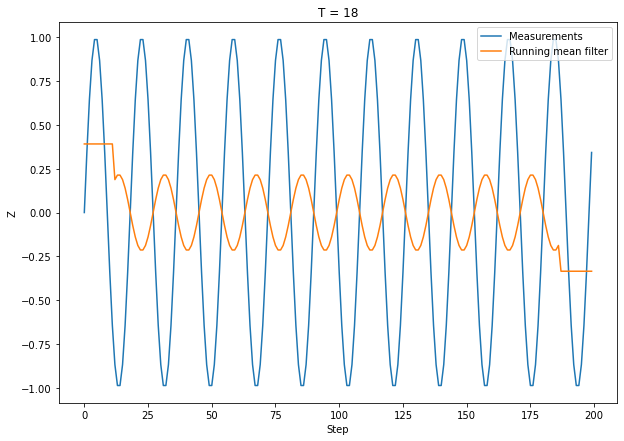

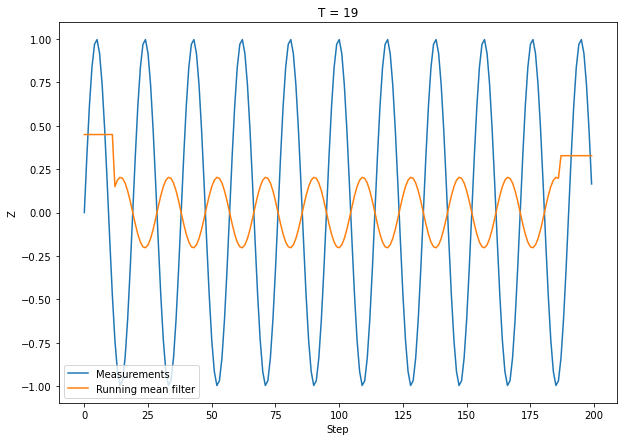

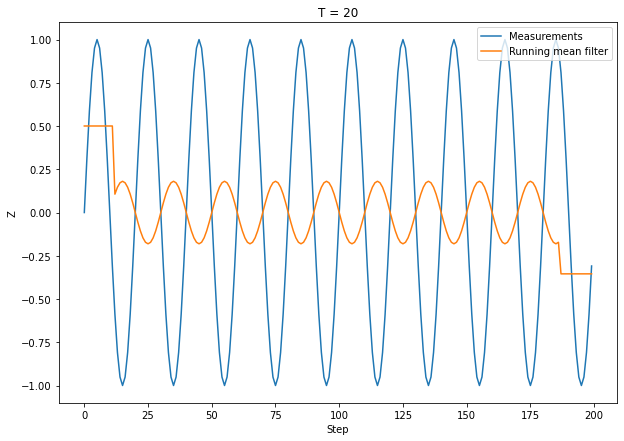

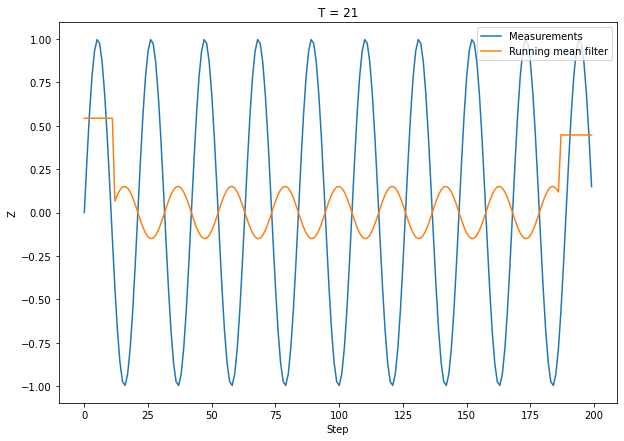

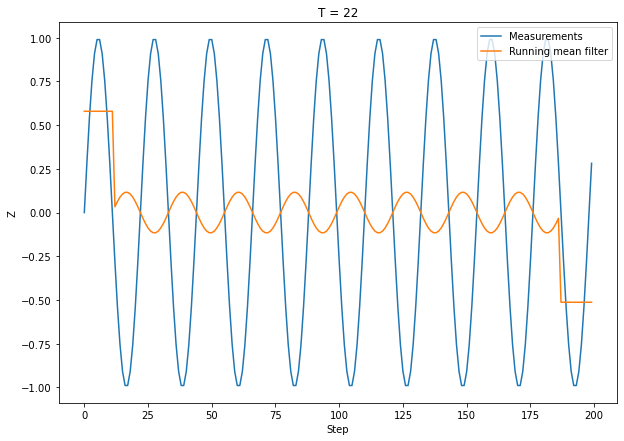

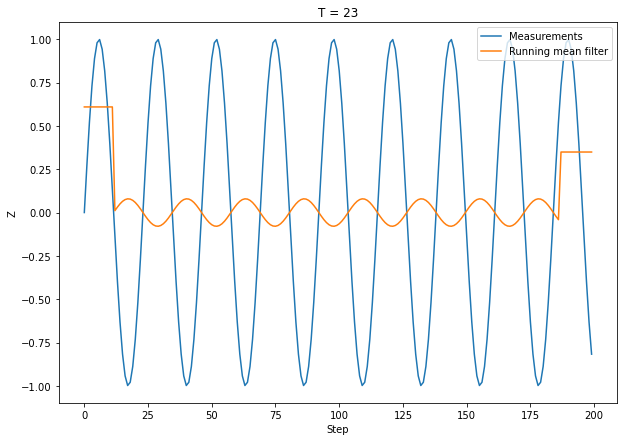

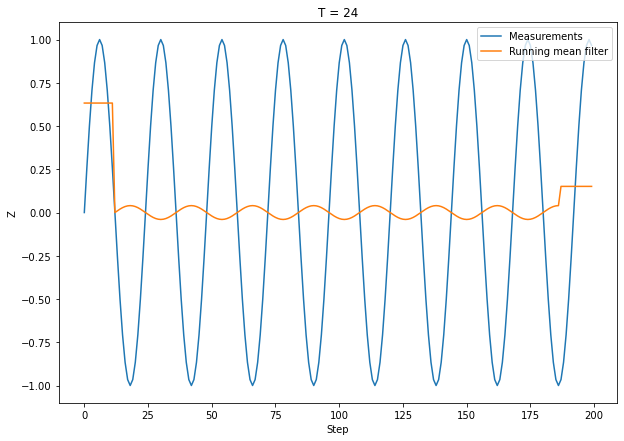

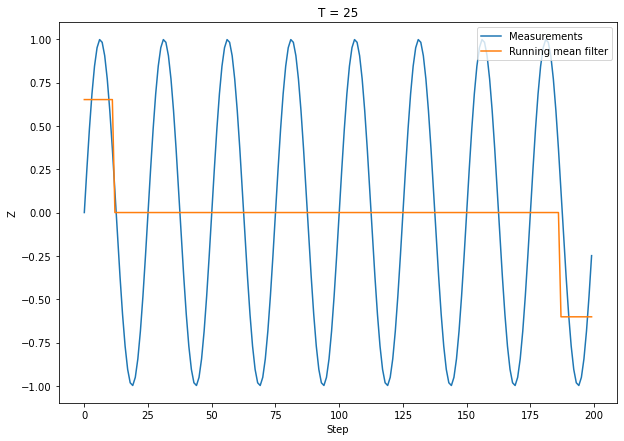

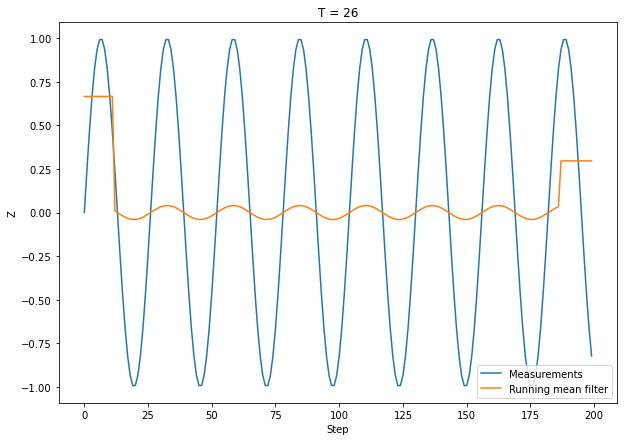

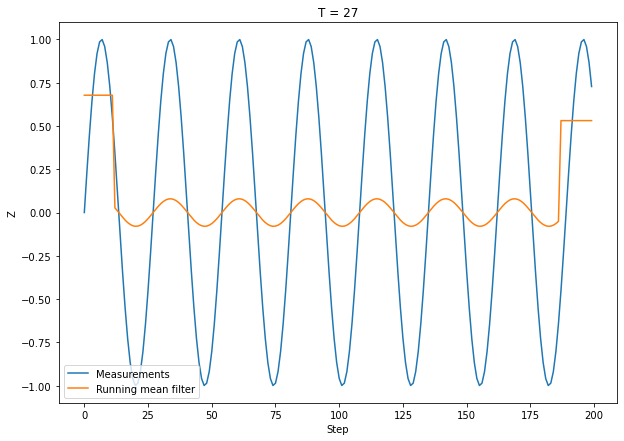

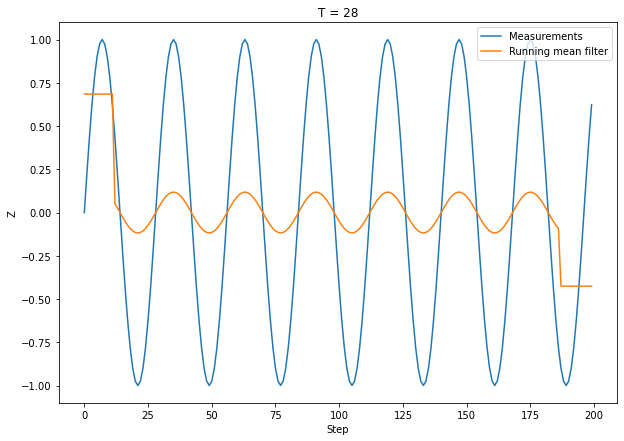

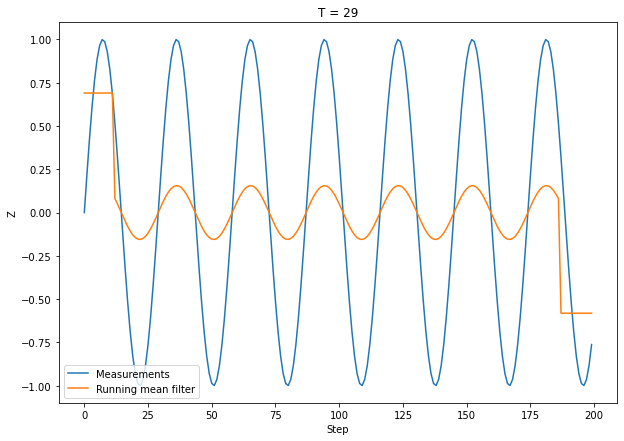

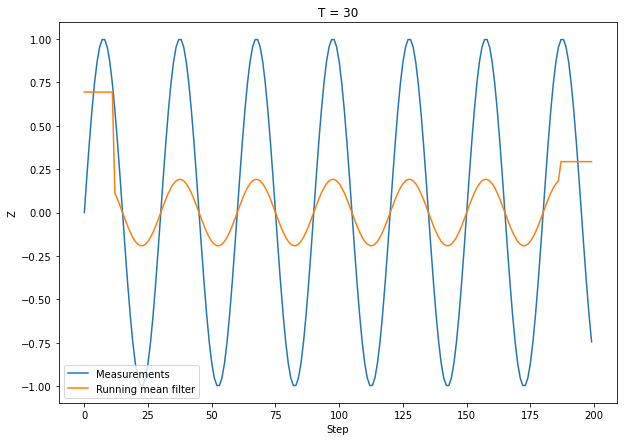

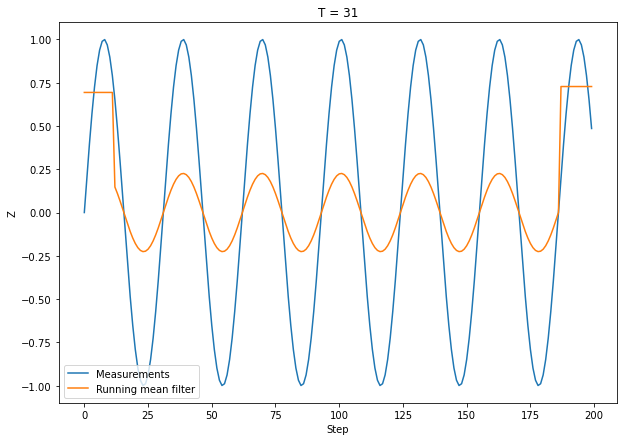

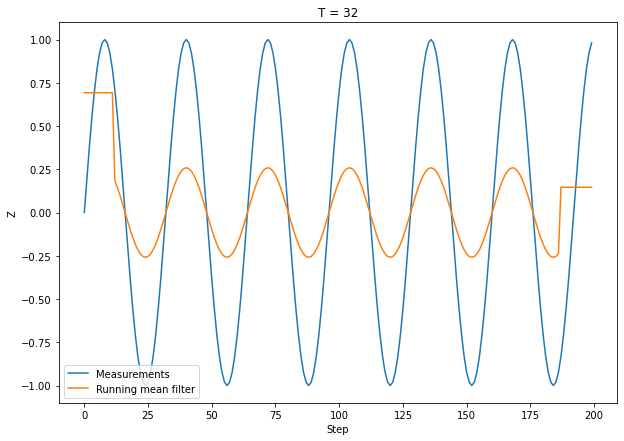

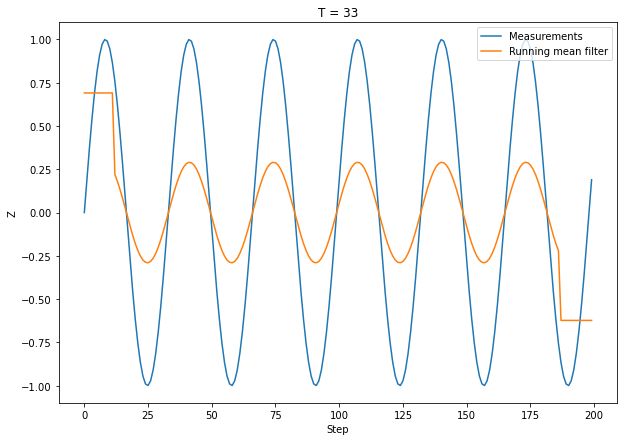

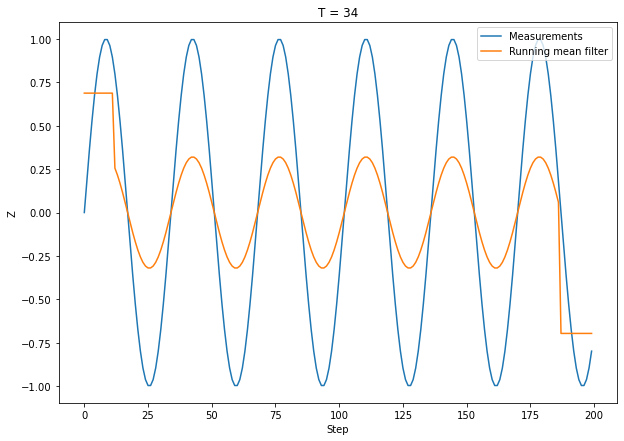

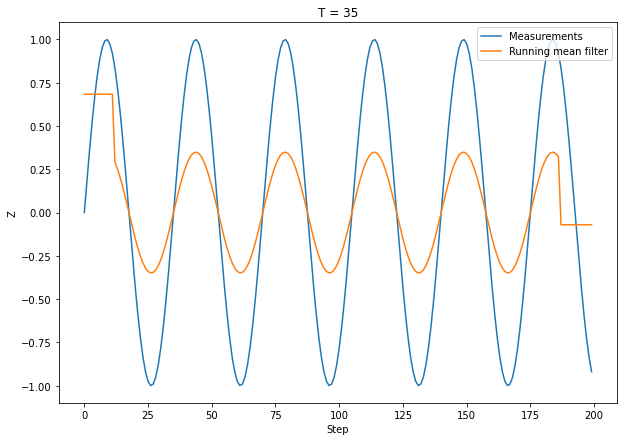

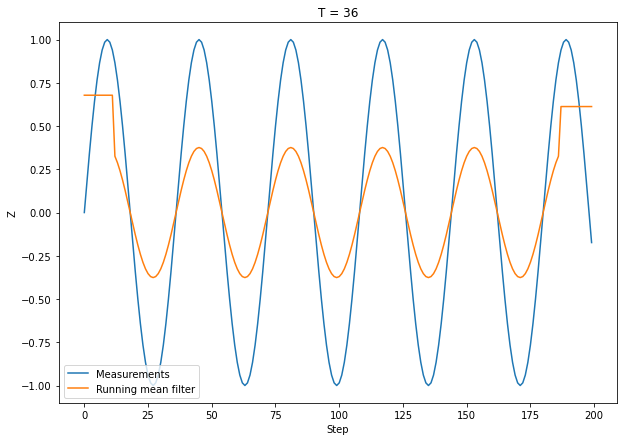

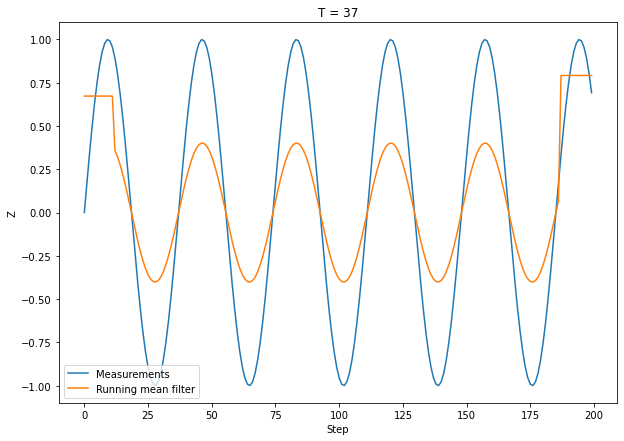

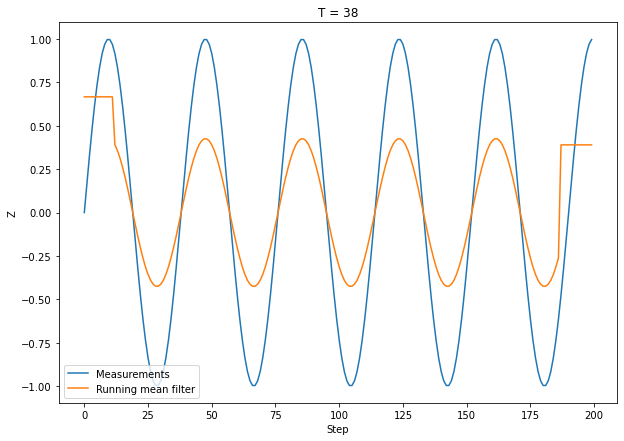

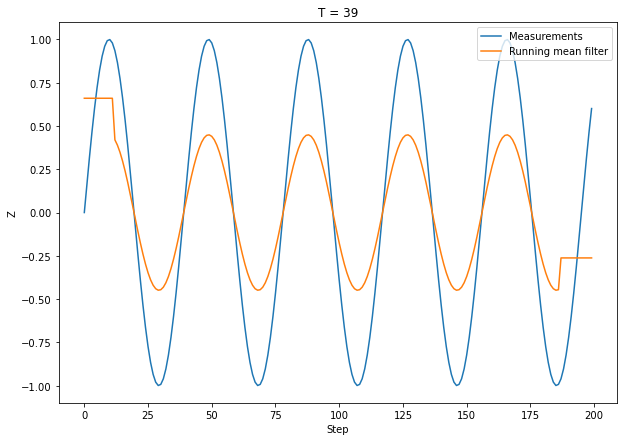

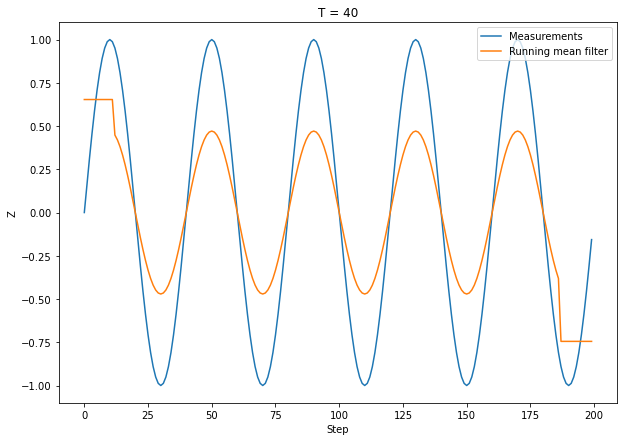

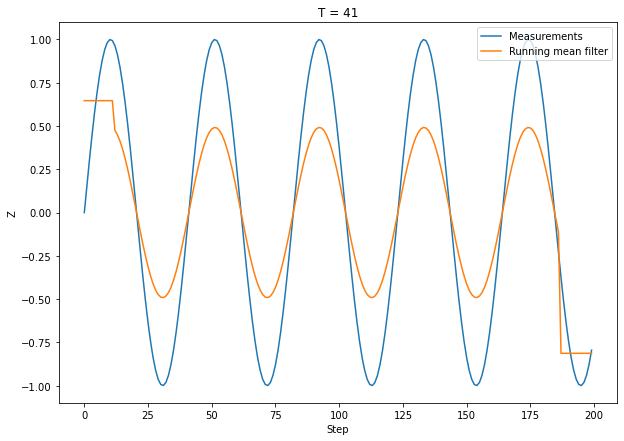

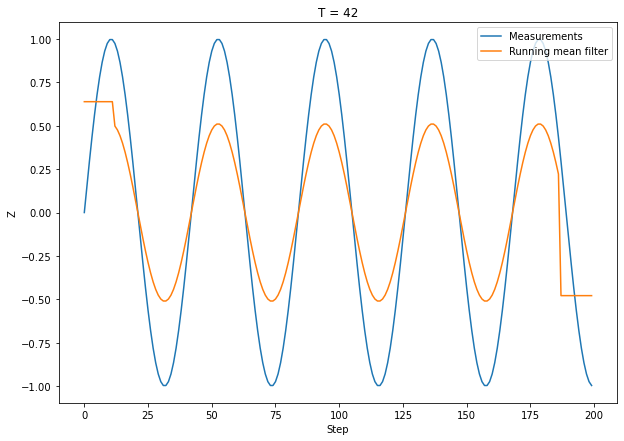

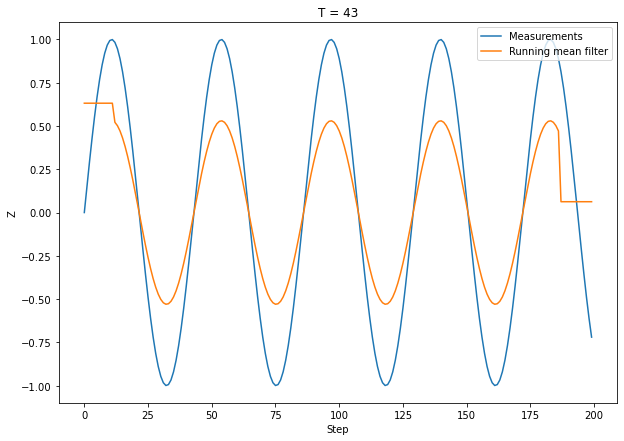

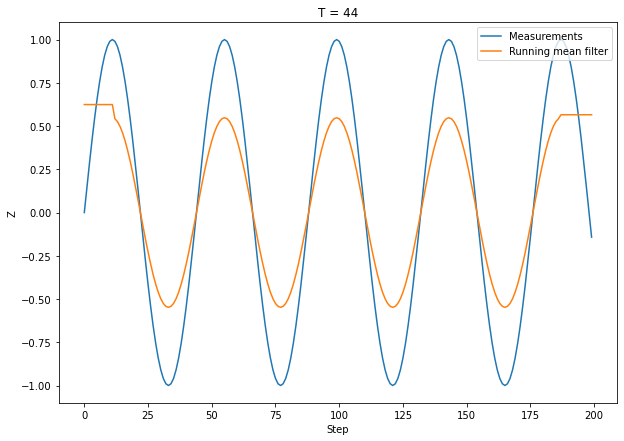

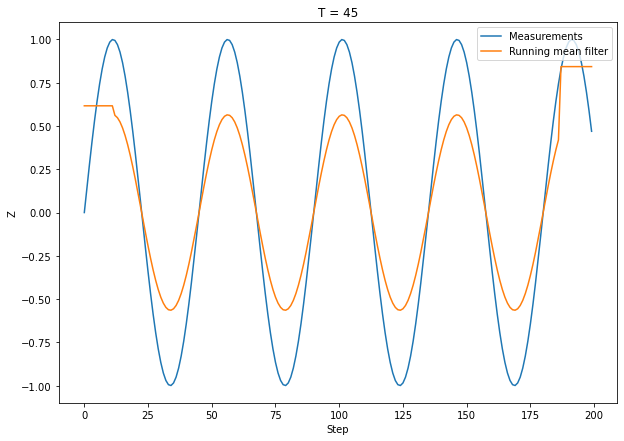

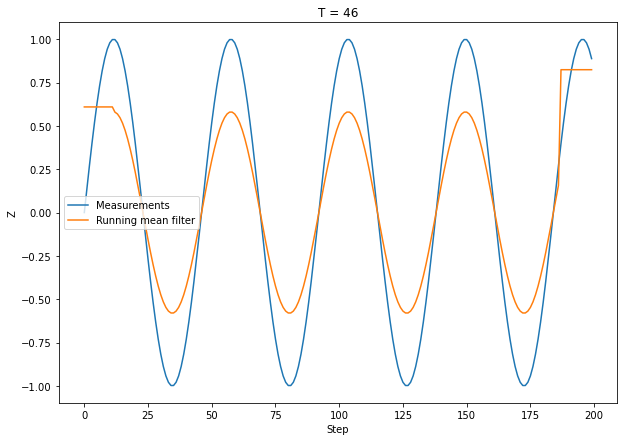

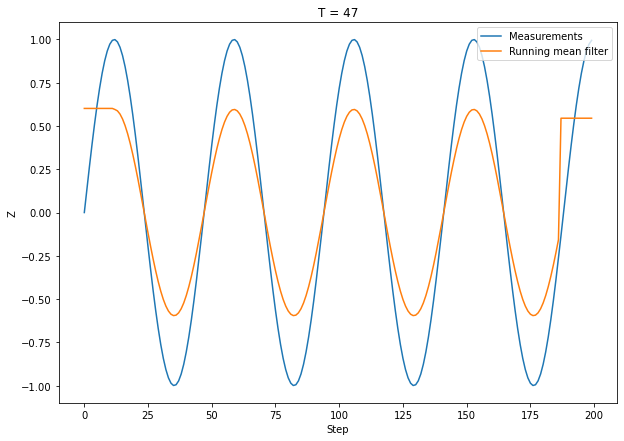

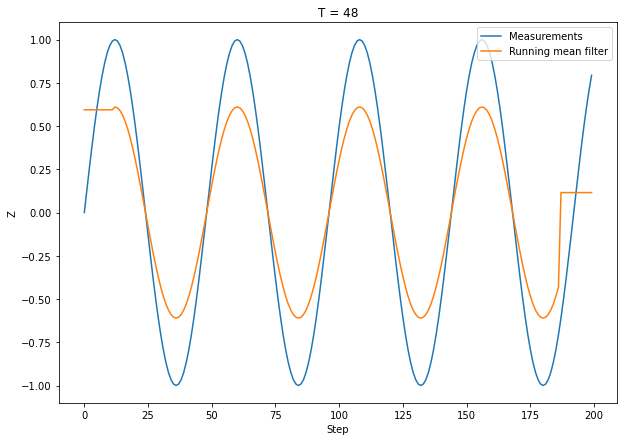

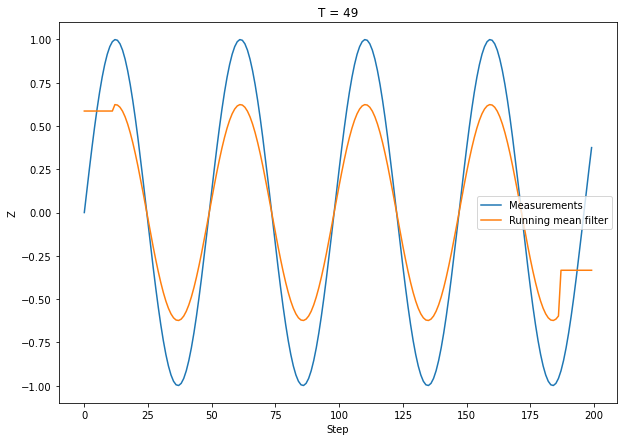

In [166]:
TT = np.arange(1,50)
for i in TT:
    T = i
    omeg = 2 * np.pi / T
    x_sin = np.zeros(200)
    for i in range(len(x_sin)):
        x_sin[i] = np.sin(omeg * i)
    z_sin = x_sin + nu_sin
    plt.figure(figsize=(10, 7))
    plt.plot(x_sin)
    plt.plot(mean_smooth(25, x_sin))
    plt.ylabel('Z')
    plt.xlabel('Step')
    plt.legend(['Measurements', 'Running mean filter'])
    plt.title( "T = " + str(T))
    plt.show()

### Inverse oscillation (a) are visible with T = 14, almost zero oscillation (b) is for T = 4 (25!), and for (c) wih insignificant change of oscillations T = 49 is most suitable.
### Hence the conclusion that choosing some optimal window size for cyclic trajectory is a challenging task because relusts of the smoothing are strongly dependent on the period of oscillation. Thus we can not only smooth measurements, but also get the inverse ones or lose oscillations at all. 

## Therefore,
### we can make a conclusion that we cannot blindly apply a method of smoothing, because they are suitable for different processes and conditions. For example, if we have a lot of noise then we have to use window size or smoothing constant with maximum smoothing. Still, by applying running mean for big smoothing (i.e. with big window size) we are risking to leave measurements at the start and end of the process overlooked. Also, we have to be careful with oscillating processes because running mean filter could give us false graph. 
### Moreover, we came to conclusion that we are allowed to ignore at least deviation indicator in case our process is known and is represented by a curve close to a line. But in general indicators are useful tools that are needed for defying how close our smoothed graph is to measurements (deviation indicator) and how how drastically it changes (variation indicator). 

### Initialisation of functions and Part 1 were carried out by Vladimir Berman. First trajectory from Part 2 was resolved by Maria Dronova. Second trajectory was made by Artem Bazhenov. Conclusions were made together after group discussion. 

In [44]:
# Проверить бункт б) - должно быть 25. 

In [92]:
print(mean_smooth(25, x_sin))

[ 5.86545491e-01  6.35424282e-01  6.77719875e-01  7.13058649e-01
  7.41207953e-01  7.62082153e-01  7.75746455e-01  7.82418447e-01
  7.82467361e-01  7.76411077e-01  7.64910948e-01  7.48764539e-01
  7.18165931e-01  6.84674449e-01  6.42582817e-01  5.92531834e-01
  5.35277523e-01  4.71676962e-01  4.02672281e-01  3.29273090e-01
  2.52537601e-01  1.73552729e-01  9.34135046e-02  1.32020844e-02
 -6.60332904e-02 -1.42851980e-01 -2.16307915e-01 -2.85262660e-01
 -3.48652415e-01 -4.05504866e-01 -4.54954436e-01 -4.96255678e-01
 -5.28794567e-01 -5.52097502e-01 -5.65837855e-01 -5.69839936e-01
 -5.64080298e-01 -5.48686342e-01 -5.23950848e-01 -4.90308514e-01
 -4.48338657e-01 -3.98755599e-01 -3.42396867e-01 -2.80209384e-01
 -2.13233909e-01 -1.42587965e-01 -6.94475540e-02  4.97202638e-03
  7.94359597e-02  1.52709926e-01  2.23580030e-01  2.90873065e-01
  3.53475352e-01  4.10350995e-01  4.60558843e-01  5.03267903e-01
  5.37770933e-01  5.63496006e-01  5.80015844e-01  5.87054782e-01
  5.84493246e-01  5.72369